In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from collections import defaultdict
import json
from scipy.stats import norm
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('../../data/2019/2019_mod.csv')

In [22]:
stop_cars = [54]
stop_times = ['1900-01-01 02:06:53.039000']
stop_zip = zip(stop_cars, stop_times)
sectors = defaultdict(lambda: defaultdict(list))
drivers = []

In [23]:
for car_num, time in stop_zip:
    temp = df[df['Car'] == car_num]
    time_dt = datetime.strptime(time, '%Y-%m-%d %H:%M:%S.%f')
    
    driver = ''
    for _, row in temp.iterrows():      
        if time_dt < datetime.strptime(row['Session Time'], '%Y-%m-%d %H:%M:%S.%f'):
            driver = row.Driver 
            break
        last_row = row
        
    if driver == '': driver = last_row.Driver    
    drivers.append(driver)
    
    temp = temp[temp['Driver'] == driver]
    
    per_yellow = True
    for _, row in temp.iterrows():  
        yellow = False
        
        if per_yellow and time_dt < datetime.strptime(row['Session Time'], '%Y-%m-%d %H:%M:%S.%f'):
            per_yellow = False
            yellow = True
        
        sectors[driver]['S1'].append((row.S01, yellow))
        sectors[driver]['S2'].append((row.S02, yellow))
        sectors[driver]['S3'].append((row.S02, yellow))
        

In [24]:
uDrivers = df['Driver'].unique()
caused_yellow = [ud in drivers for ud in uDrivers]
df2 = pd.DataFrame(columns=['Driver', 'Yellow'])
df2['Driver'] = uDrivers
df2['Yellow'] = np.array(caused_yellow).astype(int)

In [25]:
df2.to_csv('../../data/2019/19_driver_yellow.csv', index=False)

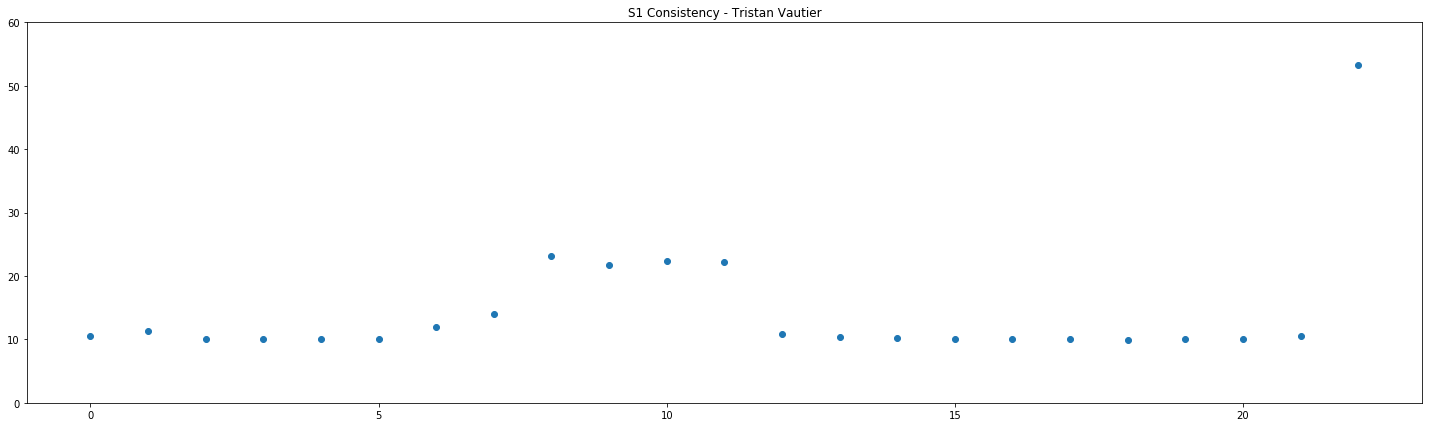

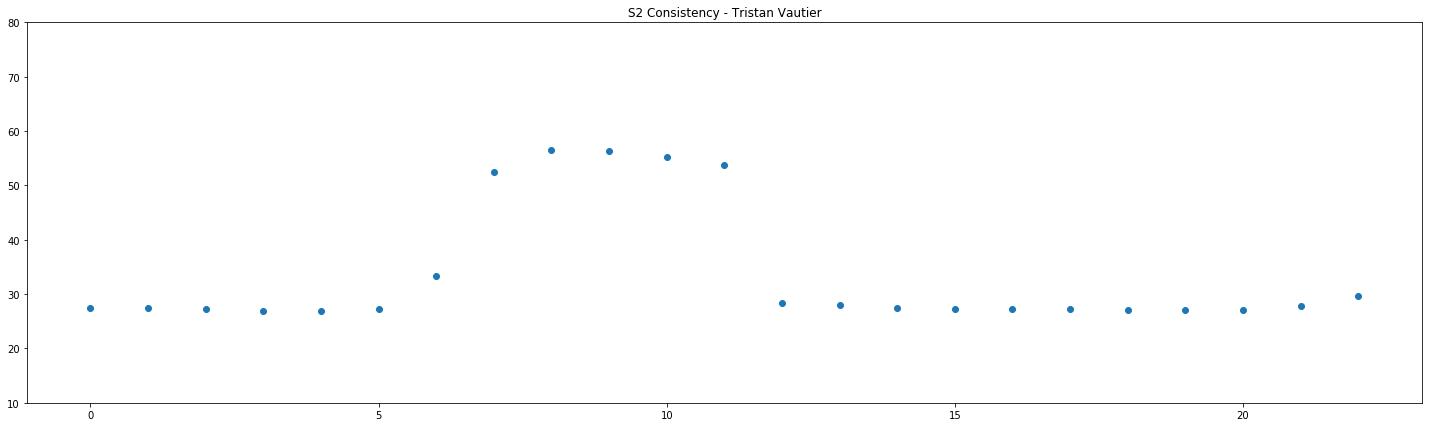

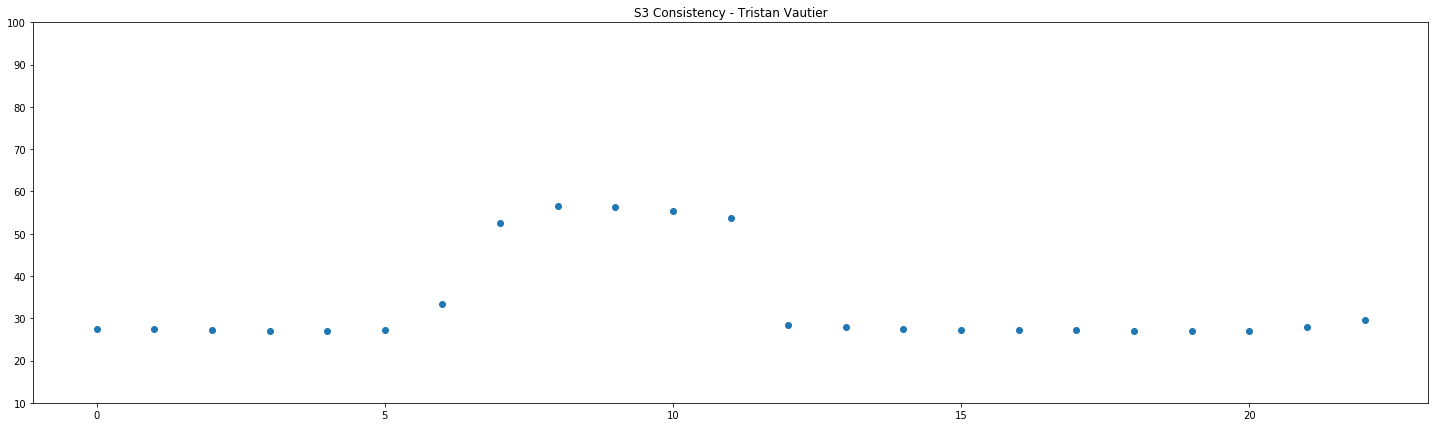

In [20]:
for driver in sectors:
    
    s1_c = np.array(list(enumerate(sectors[driver]['S1'])))
    s1_x = s1_c[:, 0]
    s1_y = [t[0] for t in s1_c[:, 1]]
    yellow_line = [t[0] for t in s1_c if t[1][1]]
    
    plt.figure(figsize=(25,7))
    plt.title('S1 Consistency - ' + driver)
    plt.ylim((0, 60))
    plt.scatter(s1_x, s1_y)
    plt.vlines(yellow_line, 0, 60)
    
    s2_c = np.array(list(enumerate(sectors[driver]['S2'])))
    s2_x = s2_c[:, 0]
    s2_y = [t[0] for t in s2_c[:, 1]]
    yellow_line = [t[0] for t in s2_c if t[1][1]]
    
    plt.figure(figsize=(25,7))
    plt.title('S2 Consistency - ' + driver)
    plt.ylim((10, 80))
    plt.scatter(s2_x, s2_y)
    plt.vlines(yellow_line, 0, 120)
    
    s3_c = np.array(list(enumerate(sectors[driver]['S3'])))
    s3_x = s3_c[:, 0]
    s3_y = [t[0] for t in s3_c[:, 1]]
    yellow_line = [t[0] for t in s3_c if t[1][1]]
    
    plt.figure(figsize=(25,7))
    plt.title('S3 Consistency - ' + driver)
    plt.ylim((10, 100))
    plt.scatter(s3_x, s3_y)
    plt.vlines(yellow_line, 0, 120)
    